## 1. Project Topic
### Breast cancer is one of the most fatal cancers among women, primarily caused by the abnormal proliferation of cells in breast tissue, leading to tumor formation that may spread to other parts of the body. Early detection and accurate prediction of breast cancer are crucial for improving treatment success rates. This study aims to explore and construct a high-precision breast cancer tumor prediction framework using various supervised learning methods (KNN-Classification, Logistics Regression) in machine learning. Such a predictive system can assist healthcare professionals in identifying high-risk patients at an earlier stage, allowing them to devise more targeted treatment strategies and ultimately improve patient survival rates and quality of life.

### Our code and dataset are open-sourced on **https://github.com/Bob-cmu/Supervised-Learning**.

## 2. Data Introduction
### The data source for this study is the Breast Cancer Wisconsin (Diagnostic) dataset, obtained from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. This dataset contains 569 records and 32 attributes. Attribute information includes ID number, diagnosis (M = malignant, B = benign), and 30 real-valued numerical variables calculated from ten features derived for each cell nucleus.
### The ten features of the cell nucleus consist of: a) radius (mean of distances from center to points on the perimeter), b) texture (standard deviation of gray-scale values), c) perimeter d) area, e) smoothness (local variation in radius lengths), f) compactness (perimeter^2 / area - 1.0), g) concavity (severity of concave portions of the contour), h) concave points (number of concave portions of the contour), i) symmetry, j) fractal dimension ("coastline approximation" - 1)
### Additional Variable Information: 1) ID number, 2) Diagnosis (M = malignant, B = benign), ......


## 3. Data Cleaning and Exploratory Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

import time
from subprocess import check_output


### 3.1 Read Dataset

In [2]:
data = pd.read_csv('breast_cancer_30.csv')

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 
Lets look at features of data.

In [3]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3.2 Data Cleaning 
The first feature, ‘ID ‘ is irrelevant and will be removed. There is also a column with all NaN values which we do not want as it will affect the machine learning models. Therefore, we do data cleaning by removing these 2 columns. 

In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3.3 Exploratory Data Analysis
To see ratio of Benign and Malignant ratio and if this dataset is quite fair. 

Number of Benign:  357
Number of Malignant :  212


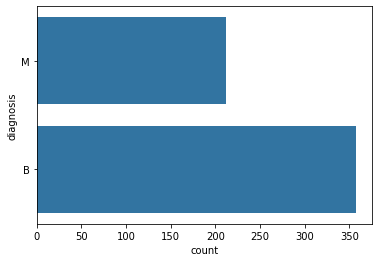

In [6]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Normalization/ Standardization before Visualization, Feature Selection or Classification

The describe functions shows helpful information such as variance, standart deviation, number of sample (count) or max min values.
Such information helps to understand about what is going on data. For example , "area_mean" feature's max value is 2501 while "smoothness_mean" features' max is around 0.16340. Thus we need to normalize/standardize the data first before before visualization, feature selection, feature extraction or classificaiton. 


In [8]:
data = x
# standardization
data_n_2 = (data - data.mean()) / (data.std())              


#### Visualization of Correlation Map
We observe all correlation between features through the heatmap.

<AxesSubplot:>

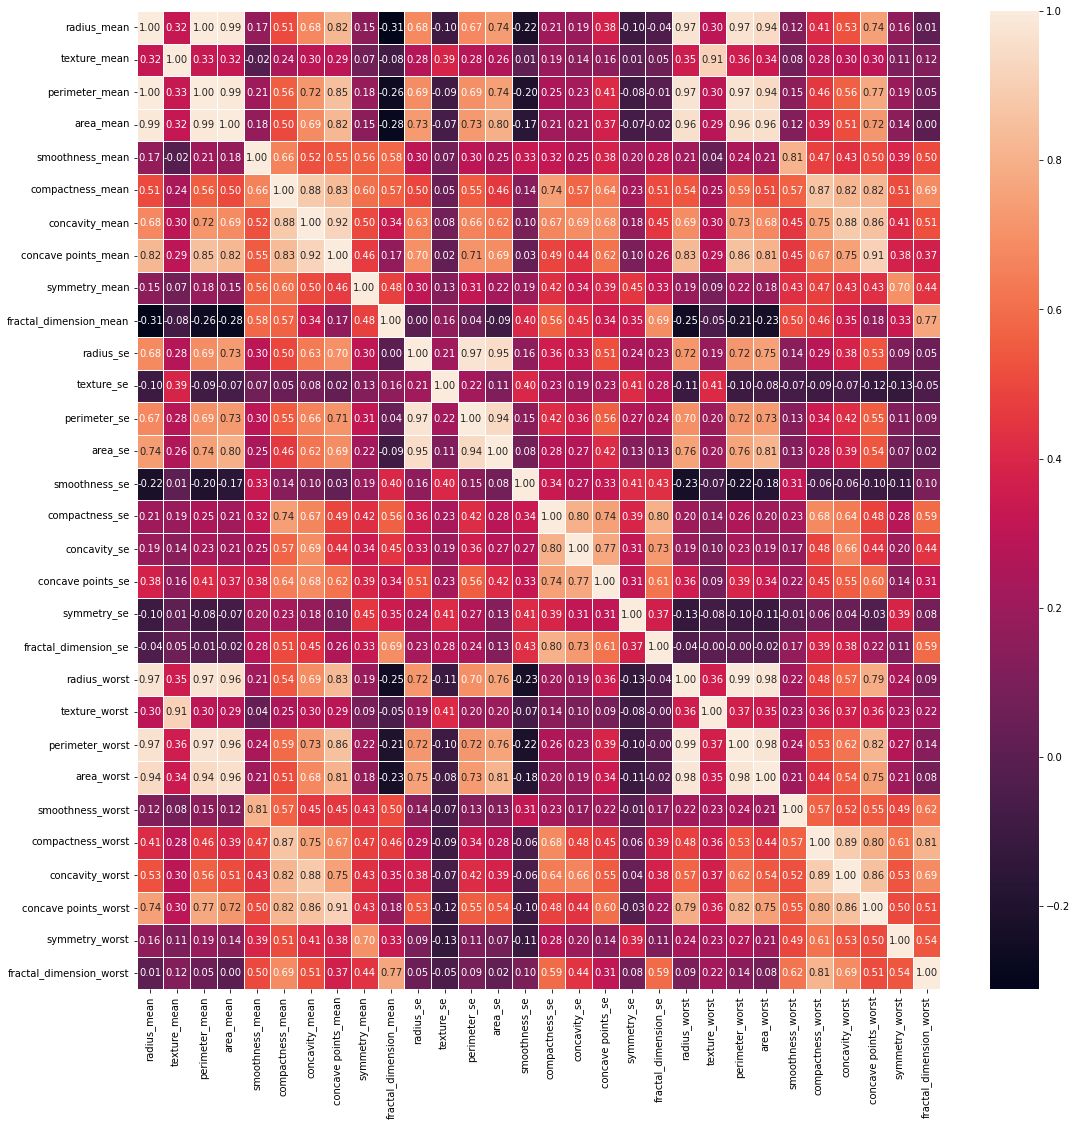

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
corr_mat = x.corr()
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

### 3.4 Feature Selection

In [11]:
for target in x:
    
    #target = 'diagnosis'
    candidates = corr_mat.index[
        ((corr_mat[target] >= 0.8) | (corr_mat[target]<=-0.8))
    ].values
    candidates = candidates[candidates != target]
    print('Correlated to', target, ': ')
    print(candidates)

    removed = []
    for c1 in candidates:
        for c2 in candidates:
            if (c1 not in removed) and (c2 not in removed):
                if c1 != c2:
                    coef = corr_mat.loc[c1, c2]
                    if coef >= 0.8 or coef <= -0.8:
                        removed.append(c1)
    print('Removed: ', removed)
   
    selected_features = [x for x in candidates if x not in removed]
    print('Selected features: ', selected_features)
    print(" ")

Correlated to radius_mean : 
['perimeter_mean' 'area_mean' 'concave points_mean' 'radius_worst'
 'perimeter_worst' 'area_worst']
Removed:  ['perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst']
Selected features:  ['area_worst']
 
Correlated to texture_mean : 
['texture_worst']
Removed:  []
Selected features:  ['texture_worst']
 
Correlated to perimeter_mean : 
['radius_mean' 'area_mean' 'concave points_mean' 'radius_worst'
 'perimeter_worst' 'area_worst']
Removed:  ['radius_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst']
Selected features:  ['area_worst']
 
Correlated to area_mean : 
['radius_mean' 'perimeter_mean' 'concave points_mean' 'area_se'
 'radius_worst' 'perimeter_worst' 'area_worst']
Removed:  ['radius_mean', 'perimeter_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst']
Selected features:  ['area_worst']
 
Correlated to smoothness_mean : 
['smoothness_worst']
Removed:  []
Selected featu

#### DropList of Features based on Algorithm
Alot of values that fall below 0.8 so a number above 0.8 is safe
to say that it is highly correlated and the -0.8 is the inverse 
of the high correlation. So after various feature selection experimentation
with different correlation number, we have decided on 0.8 for Pearson Correlation
Matrix. 

In [12]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


#### Save New File to use the new 16 Features

In [13]:
x_1.to_csv("NewFeatures_16.csv")
# But remember to add back the diagnosis column from the original file

## 4. KNN Model

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1 Read New Dataset

In [15]:
#Rename the first column of the NewFeatures_16.csv file to "diagnosis" to obtain NewFeatures_16_1.csv.
df= pd.read_csv("NewFeatures_16_1.csv")
df.head(5)

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   texture_mean             569 non-null    float64
 2   area_mean                569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  smoothness_worst         569 non-null    float64
 14  concavity_worst          5

In [17]:
df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


### 4.2 Encoding
The second feature ‘diagnosis’ is binary and categorical with the values ‘B’ for Benign and ‘M’ for Malignant. 
The variable will be the label for supervised learning problem and the values will be encoded to 0 and 1 respectively for the training. 

In [18]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

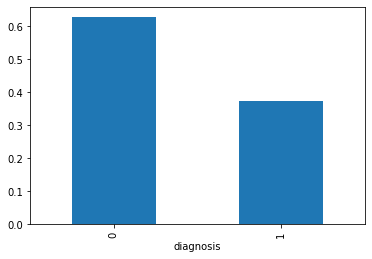

In [19]:
# df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df["diagnosis"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### 4.3 Train_Test_Split= 70/30

In [20]:
X= df.drop("diagnosis",axis=1)
y= df["diagnosis"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### 4.4 KNN Classifier
Since KNN is a distance based Algorithm- we need to do standardization of values

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) 

start_time=time.time()

clf.fit(X_train, y_train)

end_time=time.time()

print("---%s seconds ---" % (end_time - start_time))

print(clf.score(X_test, y_test))

---0.0013117790222167969 seconds ---
0.9649122807017544


### 4.5 Import Metrics and Matrix Libraries

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
# Validating the train on the model
y_train_pred =clf.predict(X_train)
y_train_prob =clf.predict_proba(X_train)[:,1]

print("Accuracy Score of train", accuracy_score(y_train,y_train_pred))
print("AUC of the train ", roc_auc_score(y_train,y_train_prob))
print(" confusion matrix \n" , confusion_matrix(y_train,y_train_pred))

Accuracy Score of train 0.9773869346733668
AUC of the train  0.9973585617638339
 confusion matrix 
 [[247   2]
 [  7 142]]


In [24]:
# Model on Test data 
y_test_pred =clf.predict(X_test)
y_test_prob =clf.predict_proba(X_test)[:,1]

print("Accuracy Score of test", accuracy_score(y_test,y_test_pred))
print("AUC of the test ", roc_auc_score(y_test,y_test_prob))
print(" confusion matrix \n" , confusion_matrix(y_test,y_test_pred))

Accuracy Score of test 0.9649122807017544
AUC of the test  0.9894179894179895
 confusion matrix 
 [[105   3]
 [  3  60]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### 4.6 Results and Analysis:
TN= 108, FP=0,
FN= 6, TP=57
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall = TP / (TP + FN) = 100 / (100 + 5) = 0.95
Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)=100/ (100+10) = 0.91
F-measure:
Fmeasure = (2 * Recall * Precision) / (Recall + Presision) = (2 * 0.95 * 0.91) / (0.91 + 0.95) = 0.92

In [26]:
#Shermaine- cross verified with data from classification report in In[29]
TN= 108
FP=0
FN= 6
TP=57
TOTAL= 171 #n

Accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Accuracy", Accuracy)

#Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall = TP / (TP + FN)
print("Recall", Recall)

#Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)
print("Precision", Precision)

F_measure = (2 * Recall * Precision) / (Recall + Precision)
print("F-Measure", F_measure)

#Misclassification Rate: Overall, how often is it wrong?
Misclassification_Rate=(FP+FN)/TOTAL
print("Error rate is",Misclassification_Rate)
#equivalent to 1 minus Accuracy
#also known as "Error Rate"
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

Accuracy 0.9649122807017544
Recall 0.9047619047619048
Precision 1.0
F-Measure 0.9500000000000001
Error rate is 0.03508771929824561


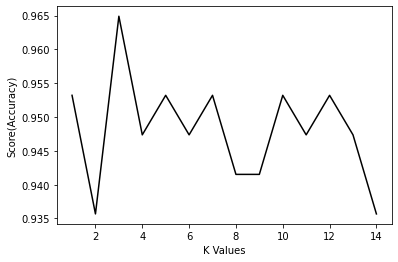

In [27]:
#Find Optimum K value
scores = []
for each in range(1,15):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(X_train,y_train)
    scores.append(KNNfind.score(X_test,y_test))
    
plt.plot(range(1,15),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

## 5. Logistics Regression Model

In [28]:
dataset=pd.read_csv('NewFeatures_16_1.csv')
dataset.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [29]:
X1=dataset.drop("diagnosis",axis=1)
X1.head()
y1=dataset['diagnosis']
y1.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 42)

#### Train the model and calculate the duration of time taken

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logReg1 = LogisticRegression(solver = 'lbfgs', max_iter=9000,multi_class = 'multinomial', random_state = 42)

start_time=time.time()

logReg1.fit(X1_train, y1_train)

end_time=time.time()

print("---%s seconds ---" % (end_time - start_time))

---0.06387639045715332 seconds ---


In [33]:
y1_pred = logReg1.predict(X1_test)

### Results and Analysis

In [34]:
print(y1_pred.shape)
print(accuracy_score(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

(171,)
0.9707602339181286
[[106   2]
 [  3  60]]


In [35]:
# Validating the train on the model
y1_train_pred =logReg1.predict(X1_train)
y1_train_prob =logReg1.predict_proba(X1_train)[:,1]

print("Accuracy Score of train", accuracy_score(y1_train,y1_train_pred))
print("AUC of the train ", roc_auc_score(y1_train,y1_train_prob))
print(" confusion matrix \n" , confusion_matrix(y1_train,y1_train_pred))

Accuracy Score of train 0.9447236180904522
AUC of the train  0.9862267863399908
 confusion matrix 
 [[241   8]
 [ 14 135]]


In [36]:
#Model on Test data
y1_test_pred=logReg1.predict(X1_test)
y1_test_prob=logReg1.predict_proba(X1_test)[:,1]

print("Accuracy Score of test", accuracy_score(y1_test,y1_test_pred))
print("AUC od the test ", roc_auc_score(y1_test,y1_test_prob))
print(" confusion matrix \n" , confusion_matrix(y1_test,y1_test_pred))

Accuracy Score of test 0.9707602339181286
AUC od the test  0.9936801881246327
 confusion matrix 
 [[106   2]
 [  3  60]]


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## 6. Neural Networks Model

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

2024-11-07 15:14:26.378457: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 15:14:26.450626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 15:14:27.655975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
# Add a first column as the ID for each row, with the same amount of data as in the NewFeatures_16_1.csv file. The final file is shown as NewFeatures_16_2.csv.
df = pd.read_csv("NewFeatures_16_2.csv")
df = df.drop(columns =["id"])
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [40]:
df1 = df.replace(to_replace =["M","B"],value=[1,0])
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
x = df1[['texture_mean', 'area_mean', 'smoothness_mean','concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']]
x.shape

(569, 16)

In [42]:
y=df1["diagnosis"]
y.shape

(569,)

### Split 90% for training, 10% for testing

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (512, 16) (512,)
Test set: (57, 16) (57,)


### We fit the scaler on your training data only, then standardise both training and test sets with that scaler

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
x_train.shape
x_test.shape

(57, 16)

### One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [46]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape
y_test.shape
model = Sequential()

### Add layers to the neural network

In [47]:
model.add(Dense(100,input_shape =(16,),activation="relu"))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(2,activation="softmax"))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6852 (26.77 KB)
Trainable params: 6852 (26.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing the model's structure

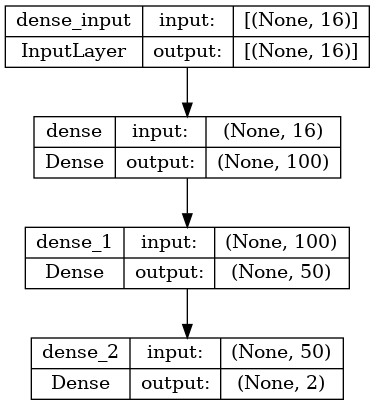

In [49]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='neuralNetwork.png', show_shapes=True, 
           show_layer_names=True)

### Compiling the model

In [50]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=50, batch_size=100,validation_split=0.1) 

Epoch 1/50
5/5 [==============================] - 1s 76ms/step - loss: 0.6786 - accuracy: 0.6000 - val_loss: 0.5812 - val_accuracy: 0.6731
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6021 - accuracy: 0.6348 - val_loss: 0.5215 - val_accuracy: 0.7308
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5356 - accuracy: 0.7500 - val_loss: 0.4708 - val_accuracy: 0.8269
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.4787 - accuracy: 0.8326 - val_loss: 0.4243 - val_accuracy: 0.8654
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 0.4249 - accuracy: 0.8826 - val_loss: 0.3832 - val_accuracy: 0.8846
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 0.3766 - accuracy: 0.9000 - val_loss: 0.3466 - val_accuracy: 0.8846
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.3334 - accuracy: 0.9109 - val_loss: 0.3138 - val_accuracy: 0.9038
Epoch 8/50
5/5 [===========

### Results and Analysis (Calculate Loss and Accuracy of the neural model)

In [52]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=100)
print("Loss = " ,loss, "Accuracy = ",accuracy)

1/1 [==============================] - 0s 33ms/step - loss: 0.1021 - accuracy: 0.9825
Loss =  0.10209643095731735 Accuracy =  0.9824561476707458


### Perform Prediction

In [53]:
predictions = model.predict(x_test)
for i in np.arange(len(predictions)):
    print(print("Actual: " , y_test[i],", Predicted:" , predictions[i]))
   

2/2 [==============================] - 0s 5ms/step
Actual:  [1. 0.] , Predicted: [0.9366148  0.06338516]
None
Actual:  [0. 1.] , Predicted: [0.00176061 0.9982394 ]
None
Actual:  [0. 1.] , Predicted: [0.00279892 0.9972011 ]
None
Actual:  [1. 0.] , Predicted: [0.997687   0.00231299]
None
Actual:  [1. 0.] , Predicted: [0.998922   0.00107802]
None
Actual:  [0. 1.] , Predicted: [2.3821670e-04 9.9976176e-01]
None
Actual:  [0. 1.] , Predicted: [3.3802437e-04 9.9966192e-01]
None
Actual:  [0. 1.] , Predicted: [0.3346914  0.66530854]
None
Actual:  [1. 0.] , Predicted: [0.6365671  0.36343282]
None
Actual:  [1. 0.] , Predicted: [0.9980794  0.00192062]
None
Actual:  [1. 0.] , Predicted: [0.82332385 0.17667617]
None
Actual:  [0. 1.] , Predicted: [0.06000805 0.9399919 ]
None
Actual:  [1. 0.] , Predicted: [0.97698784 0.02301212]
None
Actual:  [0. 1.] , Predicted: [0.01830682 0.98169315]
None
Actual:  [1. 0.] , Predicted: [0.99785644 0.00214357]
None
Actual:  [0. 1.] , Predicted: [0.02779995 0.9722001 

## 7. Discussion and Conclusion
### In this study, we applied three supervised learning methods to predict the malignancy or benignity of breast cancer and evaluated their performance by comparing accuracy, recall, precision, and F1 score. This analysis yielded some key observations and conclusions.

### Firstly, the **K-Nearest Neighbors (KNN) method** showed a high prediction performance, with an accuracy of 96.49%, a recall of 90.48%, and a precision of 100%. The F1 score for KNN was 0.95, indicating that the model balanced well in identifying both benign and malignant tumors. However, KNN had an error rate of 3.51%, suggesting the model might lack precision in some borderline cases. Additionally, KNN can be computationally inefficient for high-dimensional data, which is a factor to consider for practical applications given its time complexity.

### Secondly, the **Logistic Regression method** also demonstrated excellent performance, with an overall accuracy of 97%. Results showed that the model’s precision and recall for benign tumors (B) were both close to 98%, while the recall for malignant tumors (M) was 95%, indicating that the model performed slightly better in identifying benign tumors. Logistic regression is advantageous for its high computational efficiency and interpretability. This model exhibited stable performance on this dataset, making it suitable for tasks where the relationship between features and target variables is linear.

### Lastly, the **Neural Networks model** performed slightly better than the previous methods, with an accuracy of 98.25% and a loss of 0.1158. This high accuracy indicates that it effectively captured complex non-linear relationships in the data. However, neural networks require more training time and computational resources, and with a limited number of features, they may be prone to overfitting. This model is ideal for larger datasets with complex feature relationships.

### Our comparative analysis revealed that all three models effectively predict the malignancy or benignity of breast cancer. The neural networks model achieved the highest accuracy, though at a higher computational cost; logistic regression provided a good balance between performance and computational efficiency; and the KNN model delivered solid accuracy and error rates, although it may have limitations in computational complexity. Therefore, model selection should depend on the specific application needs and computational resources available.

### For future research, we suggest incorporating a larger dataset to further validate the generalization of these models. Additionally, exploring feature engineering or hyperparameter optimization could further enhance model performance to meet more complex clinical applications.